# Momento de Retroalimentación: Módulo 1 Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos (Portafolio Análisis) Fabian Trejo A01423983

Una empresa automovilística china aspira a entrar en el mercado estadounidense. Desea establecer allí una unidad de fabricación y producir automóviles localmente para competir con sus contrapartes estadounidenses y europeas. Contrataron una empresa de consultoría de automóviles para identificar los principales factores de los que depende el precio de los automóviles, específicamente, en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. Esencialmente, la empresa quiere saber:

Qué variables son significativas para predecir el precio de un automóvil
Qué tan bien describen esas variables el precio de un automóvil

## Exploración y preparación de la base de datos (Portafolio de Análisis)

### Exploración de la base de datos

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data

df = pd.read_csv('precios_autos.csv')
df.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Data cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

In [4]:
# Convert the variables to the correct type

convertDict = {'CarName': 'string',
               'fueltype': 'string',
               'carbody': 'string',
               'drivewheel': 'string',
               'enginelocation': 'string',
               'enginetype': 'string',
               'cylindernumber': 'string'}
#df = df.astype(convertDict)

In [5]:
#Code to extract the company name from the CarName column

def getCompanyName(carName):
    company = carName.split(" ")[0].lower()
    if company == 'maxda': return 'mazda'
    if company == 'vw': return 'volkswagen'
    return company
    

df['carcompany'] = df['CarName'].apply(getCompanyName)
df.drop(['CarName'], axis=1, inplace=True)

In [6]:
#Dividing the data into quantitative and qualitative variables

cuantitativas = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
cualitativas = ['carcompany', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']
dfCuantitativas = df[cuantitativas]
dfCualitativas = df[cualitativas]

#### Calcula medidas estadísticas apropiadas para las variables cuantitativas (media, desviación estándar, cuantiles, etc) y para las cualitativas (cuantiles, frecuencias)

In [7]:
dfCualitativas.head()

,carcompany,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber
0,alfa-romero,gas,convertible,rwd,front,dohc,four
1,alfa-romero,gas,convertible,rwd,front,dohc,four
2,alfa-romero,gas,hatchback,rwd,front,ohcv,six
3,audi,gas,sedan,fwd,front,ohc,four
4,audi,gas,sedan,4wd,front,ohc,five


In [8]:
#Exploratory analysis of quantitative variables

dfExploracionCuantitativas = dfCuantitativas.describe()
dfExploracionCuantitativas

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [9]:
#Exploratory analysis of qualitative variables

dfExploracionCualitativas = dfCualitativas.describe()
dfExploracionCualitativas

,carcompany,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber
count,205,205,205,205,205,205,205
unique,22,2,5,3,2,7,7
top,toyota,gas,sedan,fwd,front,ohc,four
freq,32,185,96,120,202,148,159


#### Explora los datos usando herramientas de visualización

##### Variables cuantitativas

In [10]:
#Quantiles of quantitative variables

dfPosicionCuantitativas = dfCuantitativas.quantile([0.25, 0.5, 0.75])
dfPosicionCuantitativas

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0.25,0.0,94.5,166.3,64.1,52.0,2145.0,97.0,3.11,8.6,70.0,4800.0,19.0,25.0
0.50,1.0,97.0,173.2,65.5,54.1,2414.0,120.0,3.29,9.0,95.0,5200.0,24.0,30.0
0.75,2.0,102.4,183.1,66.9,55.5,2935.0,141.0,3.41,9.4,116.0,5500.0,30.0,34.0


In [11]:
#Outliers of quantitative variables

def find_outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

In [12]:
for i in cuantitativas:
    print(i, find_outliers_iqr(dfCuantitativas[i]))

symboling []
wheelbase [115.6, 115.6, 120.9]
carlength [141.1]
carwidth [71.4, 71.4, 71.4, 71.7, 71.7, 71.7, 72.0, 72.3]
carheight []
curbweight []
enginesize [209, 209, 209, 258, 258, 326, 234, 234, 308, 304]
stroke [3.9, 4.17, 4.17, 2.19, 2.19, 3.9, 3.9, 2.07, 2.36, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64]
compressionratio [7.0, 7.0, 11.5, 22.7, 22.0, 21.5, 21.5, 21.5, 21.5, 7.0, 7.0, 7.0, 21.9, 21.0, 21.0, 21.0, 21.0, 21.0, 7.0, 7.0, 22.5, 22.5, 22.5, 23.0, 23.0, 23.0, 23.0, 23.0]
horsepower [262, 200, 207, 207, 207, 288]
peakrpm [6600, 6600]
citympg [47, 49]
highwaympg [53, 54, 50]


In [13]:
#Function Boxplot for quantitative variables

def boxplot(data):
    
    numData = len(data.columns)
    
    numRow = int(numData/5)+1
    
    plt.figure(figsize=(25, 5*numRow))
    for i, categorical_col in enumerate(data.columns):
            plt.subplot(numRow, 5, i+1)
            sns.boxplot(x=categorical_col, data=data)
            plt.title(f'Box Plot of {categorical_col}')
            plt.xlabel(categorical_col)

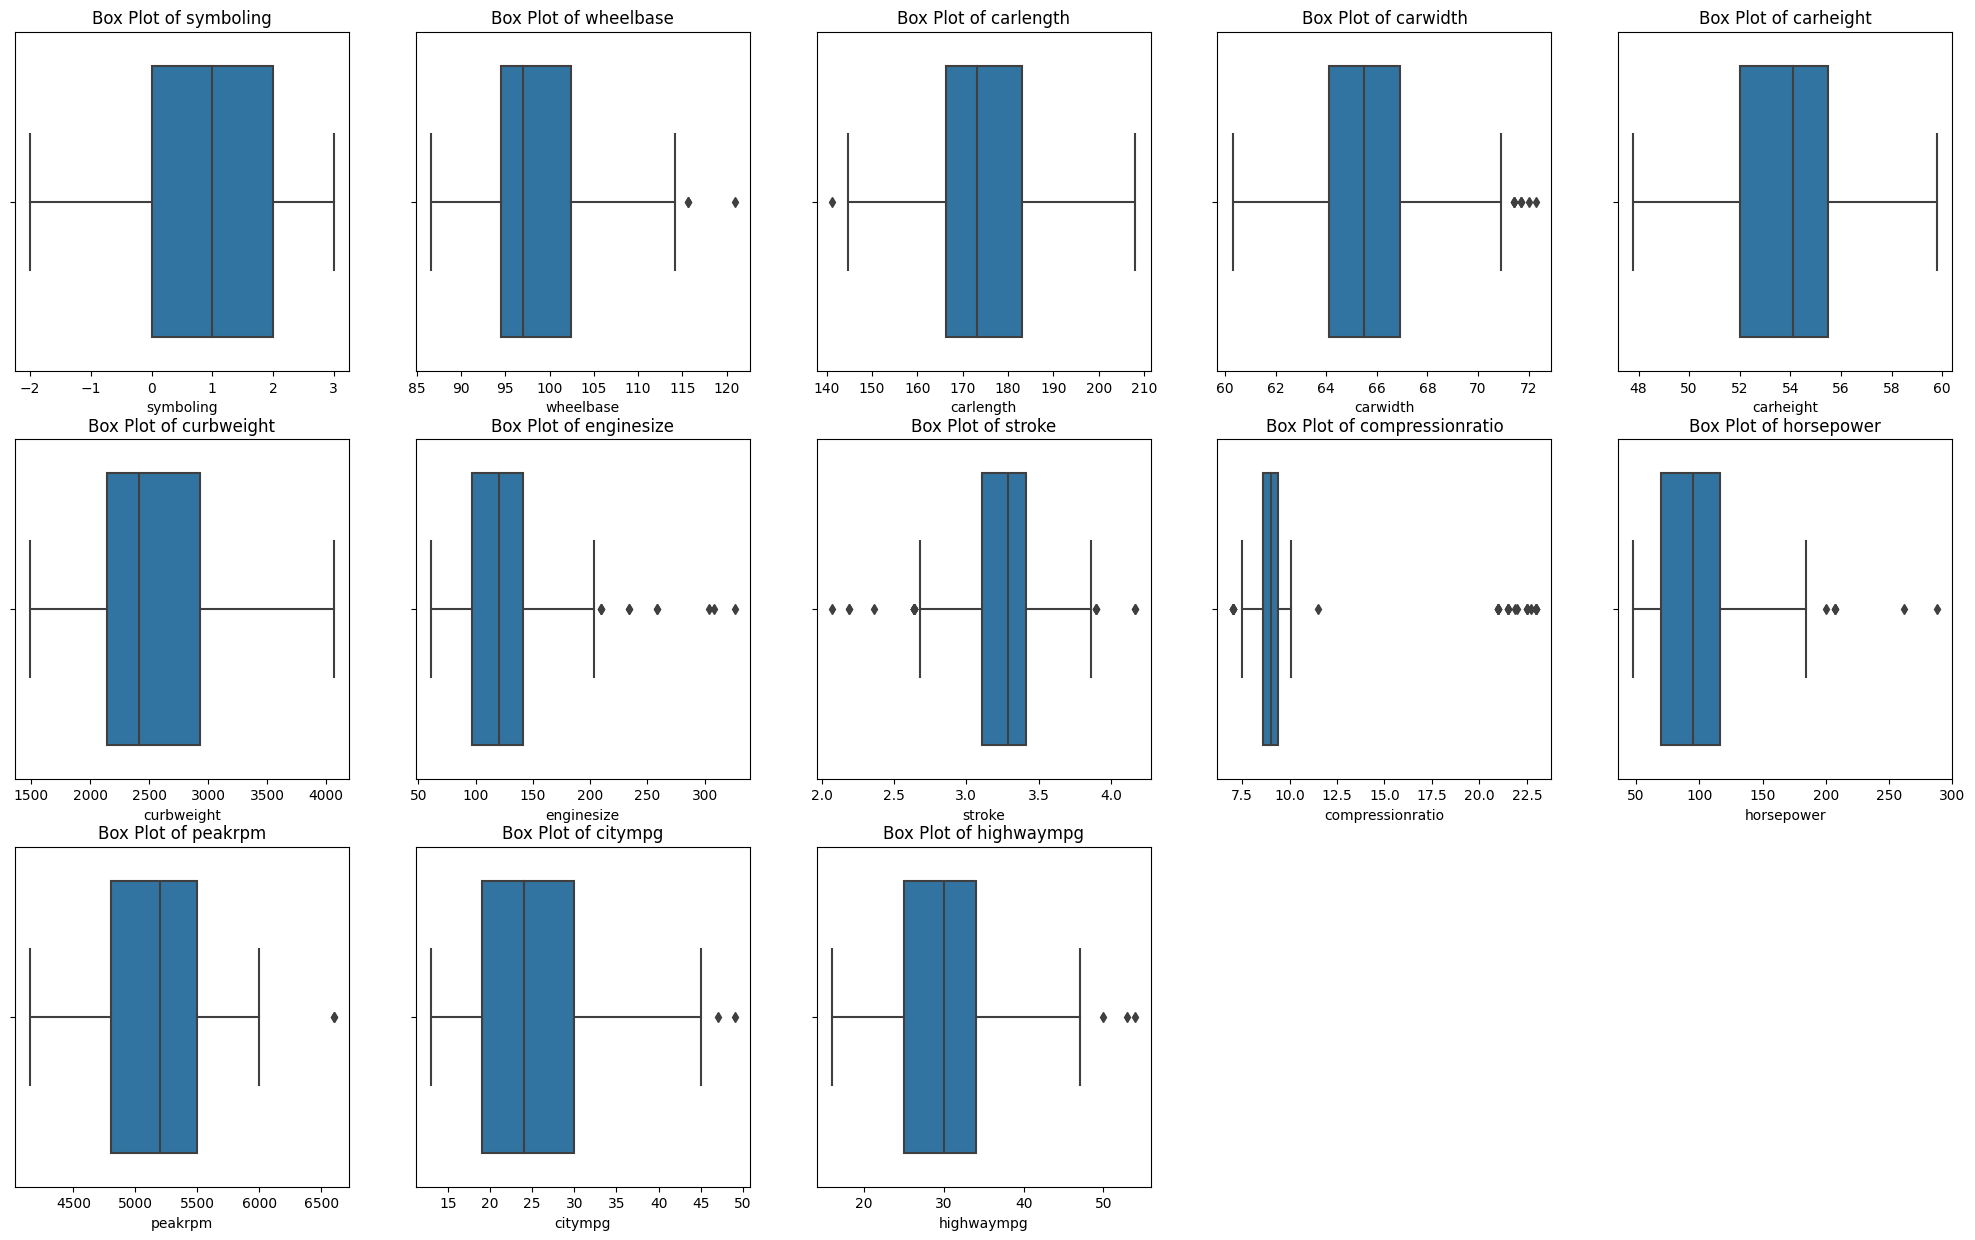

In [14]:
#Boxplot for quantitative variables

boxplot(dfCuantitativas)

In [15]:
#Histogram for quantitative variables

def histogram(data):
    
    numData = len(data.columns)
    
    numRow = int(numData/5)+1
    
    plt.figure(figsize=(25, 5*numRow))
    for i, categorical_col in enumerate(data.columns):
            plt.subplot(numRow, 5, i+1)
            sns.histplot(data[categorical_col])
            plt.title(f'Histogram of {categorical_col}')
            plt.xlabel(categorical_col)

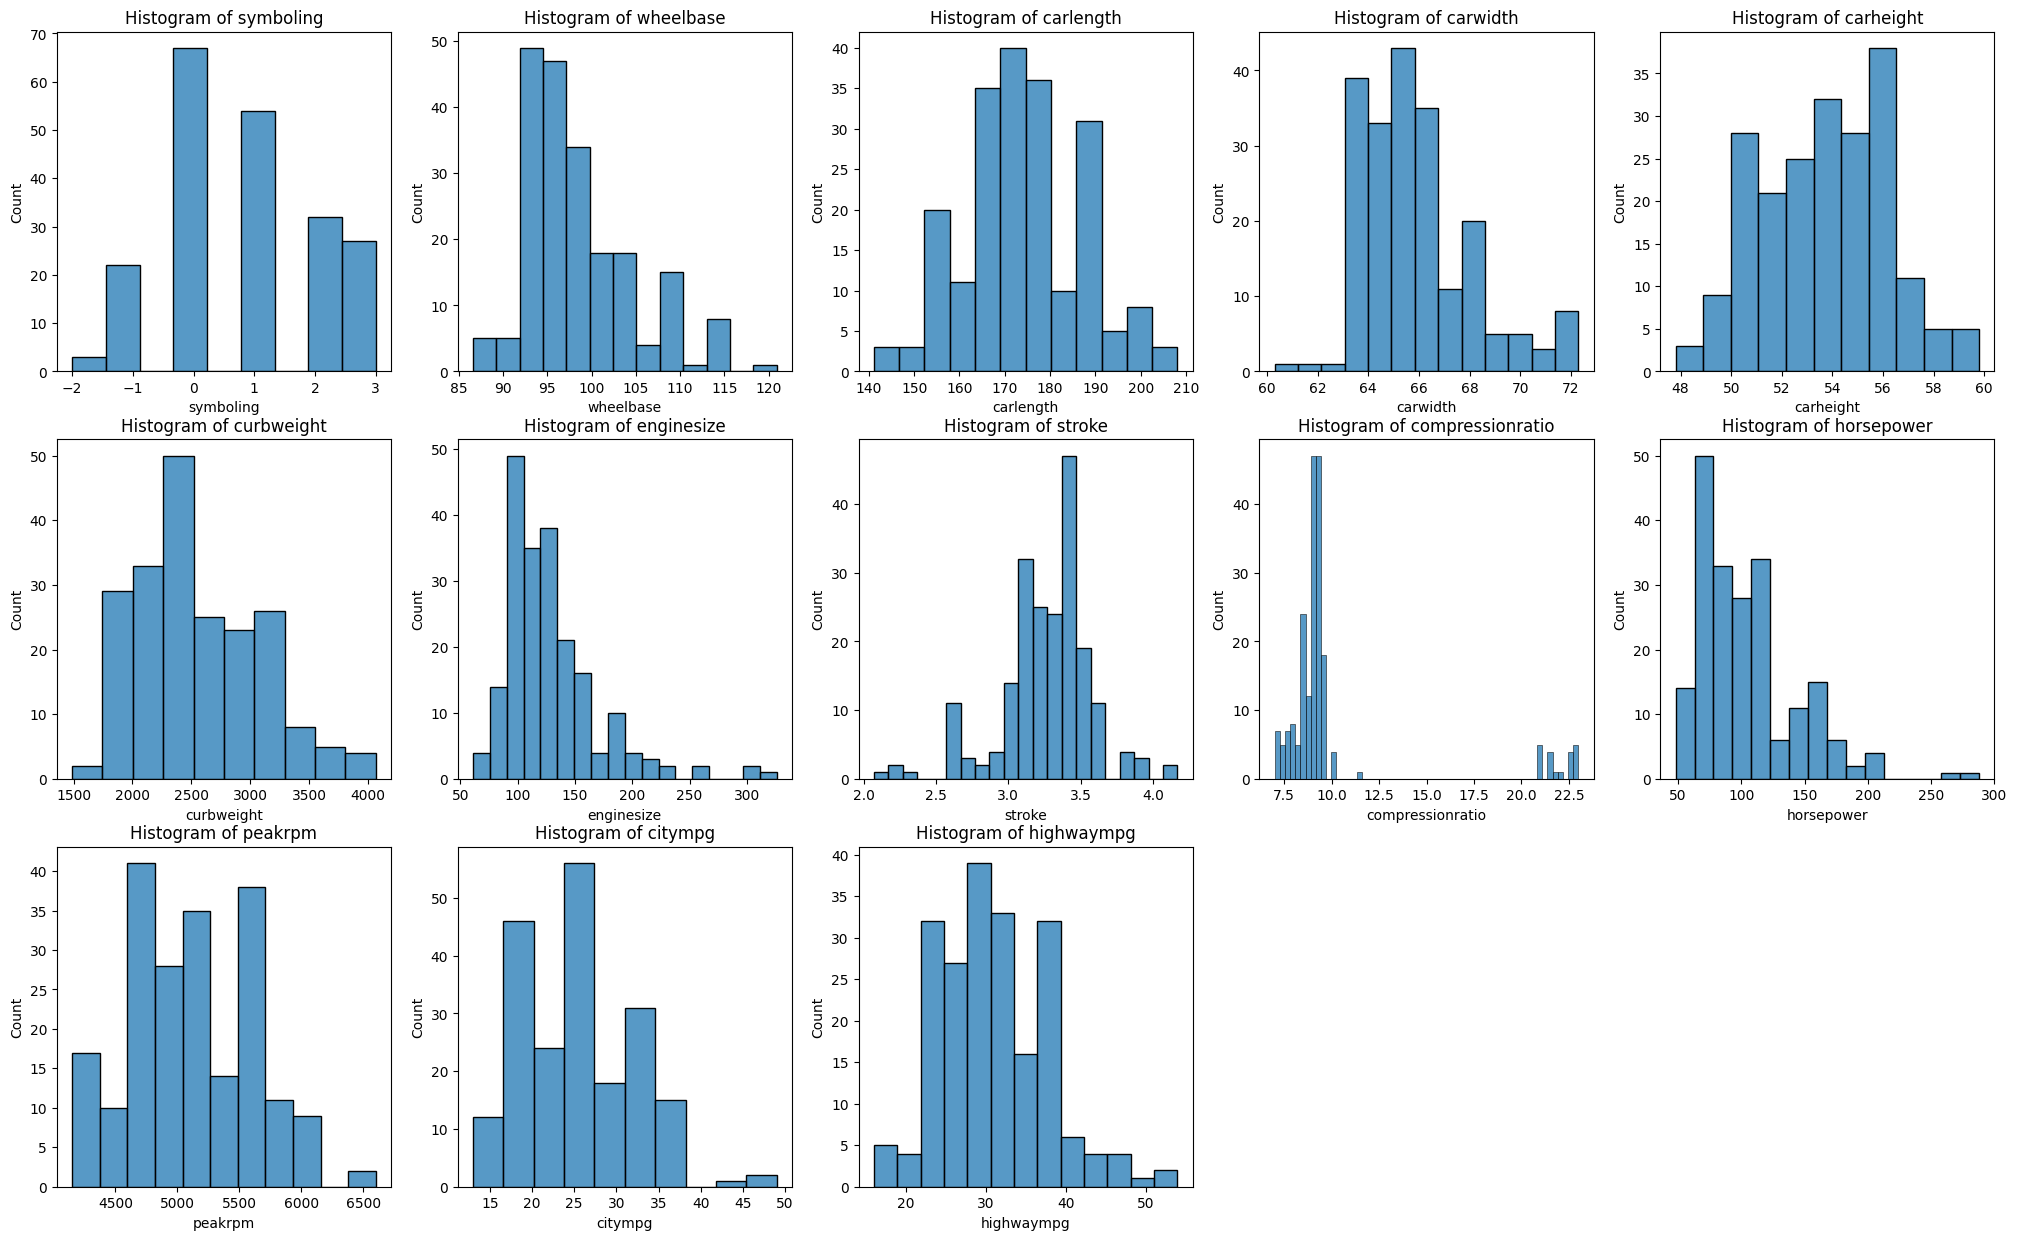

In [16]:
#Histogram for quantitative variables

histogram(dfCuantitativas)

In [17]:
#Calculate kurtosis and skewness

dfDistribucionCuantitativa = pd.DataFrame(index=cuantitativas)

dfDistribucionCuantitativa['kurtosis'] = dfCuantitativas.kurtosis()
dfDistribucionCuantitativa['skewness'] = dfCuantitativas.skew()

dfDistribucionCuantitativa


,kurtosis,skewness
symboling,-0.676271,0.211072
wheelbase,1.017039,1.050214
carlength,-0.082895,0.155954
carwidth,0.702764,0.904003
carheight,-0.443812,0.063123
curbweight,-0.042854,0.681398
enginesize,5.305682,1.947655
stroke,2.174396,-0.689705
compressionratio,5.233054,2.610862
horsepower,2.684006,1.405310


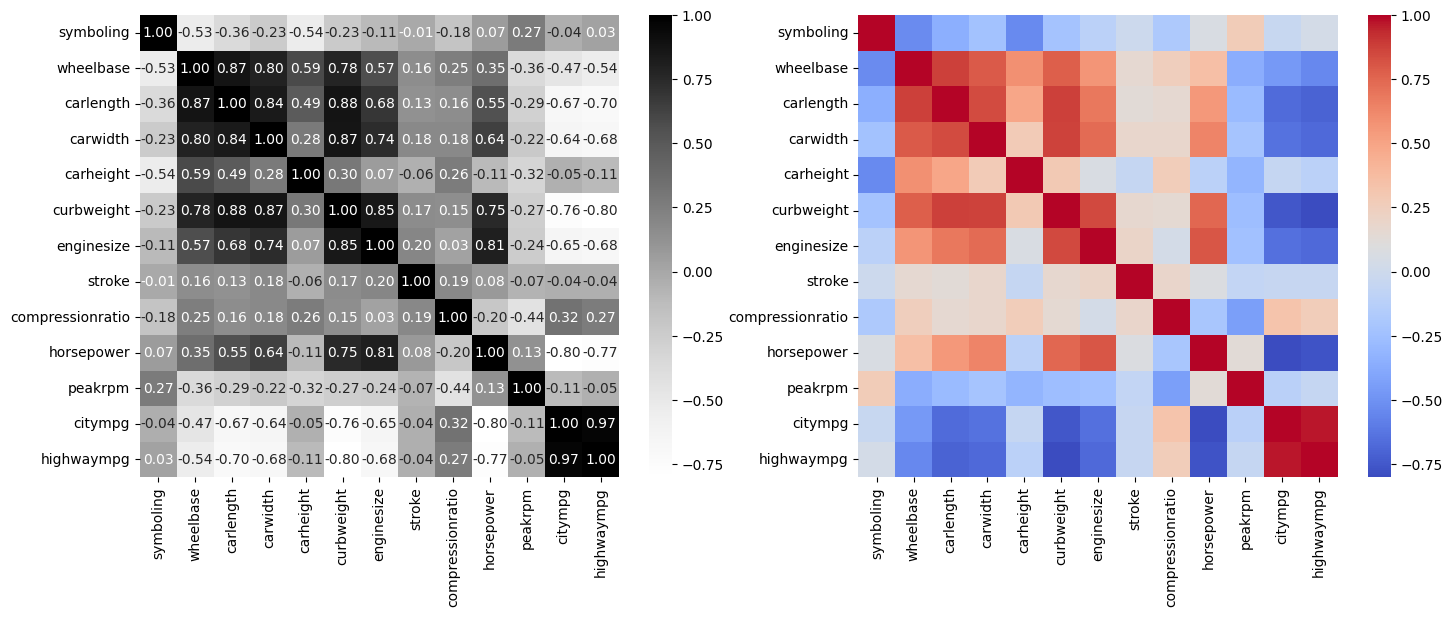

In [18]:
#Calculate the correlation matrix

dfCorrelacionCuantitativas = dfCuantitativas.corr()

#Heatmap for correlation matrix

plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
sns.heatmap(dfCorrelacionCuantitativas, cmap='Greys', annot=True, fmt='.2f')
plt.subplot(1, 2, 2)
sns.heatmap(dfCorrelacionCuantitativas, cmap='coolwarm')
plt.show()

c:\Users\Fabian\anaconda3\envs\Titanic\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Fabian\AppData\Local\Temp\ipykernel_18264\4043630520.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


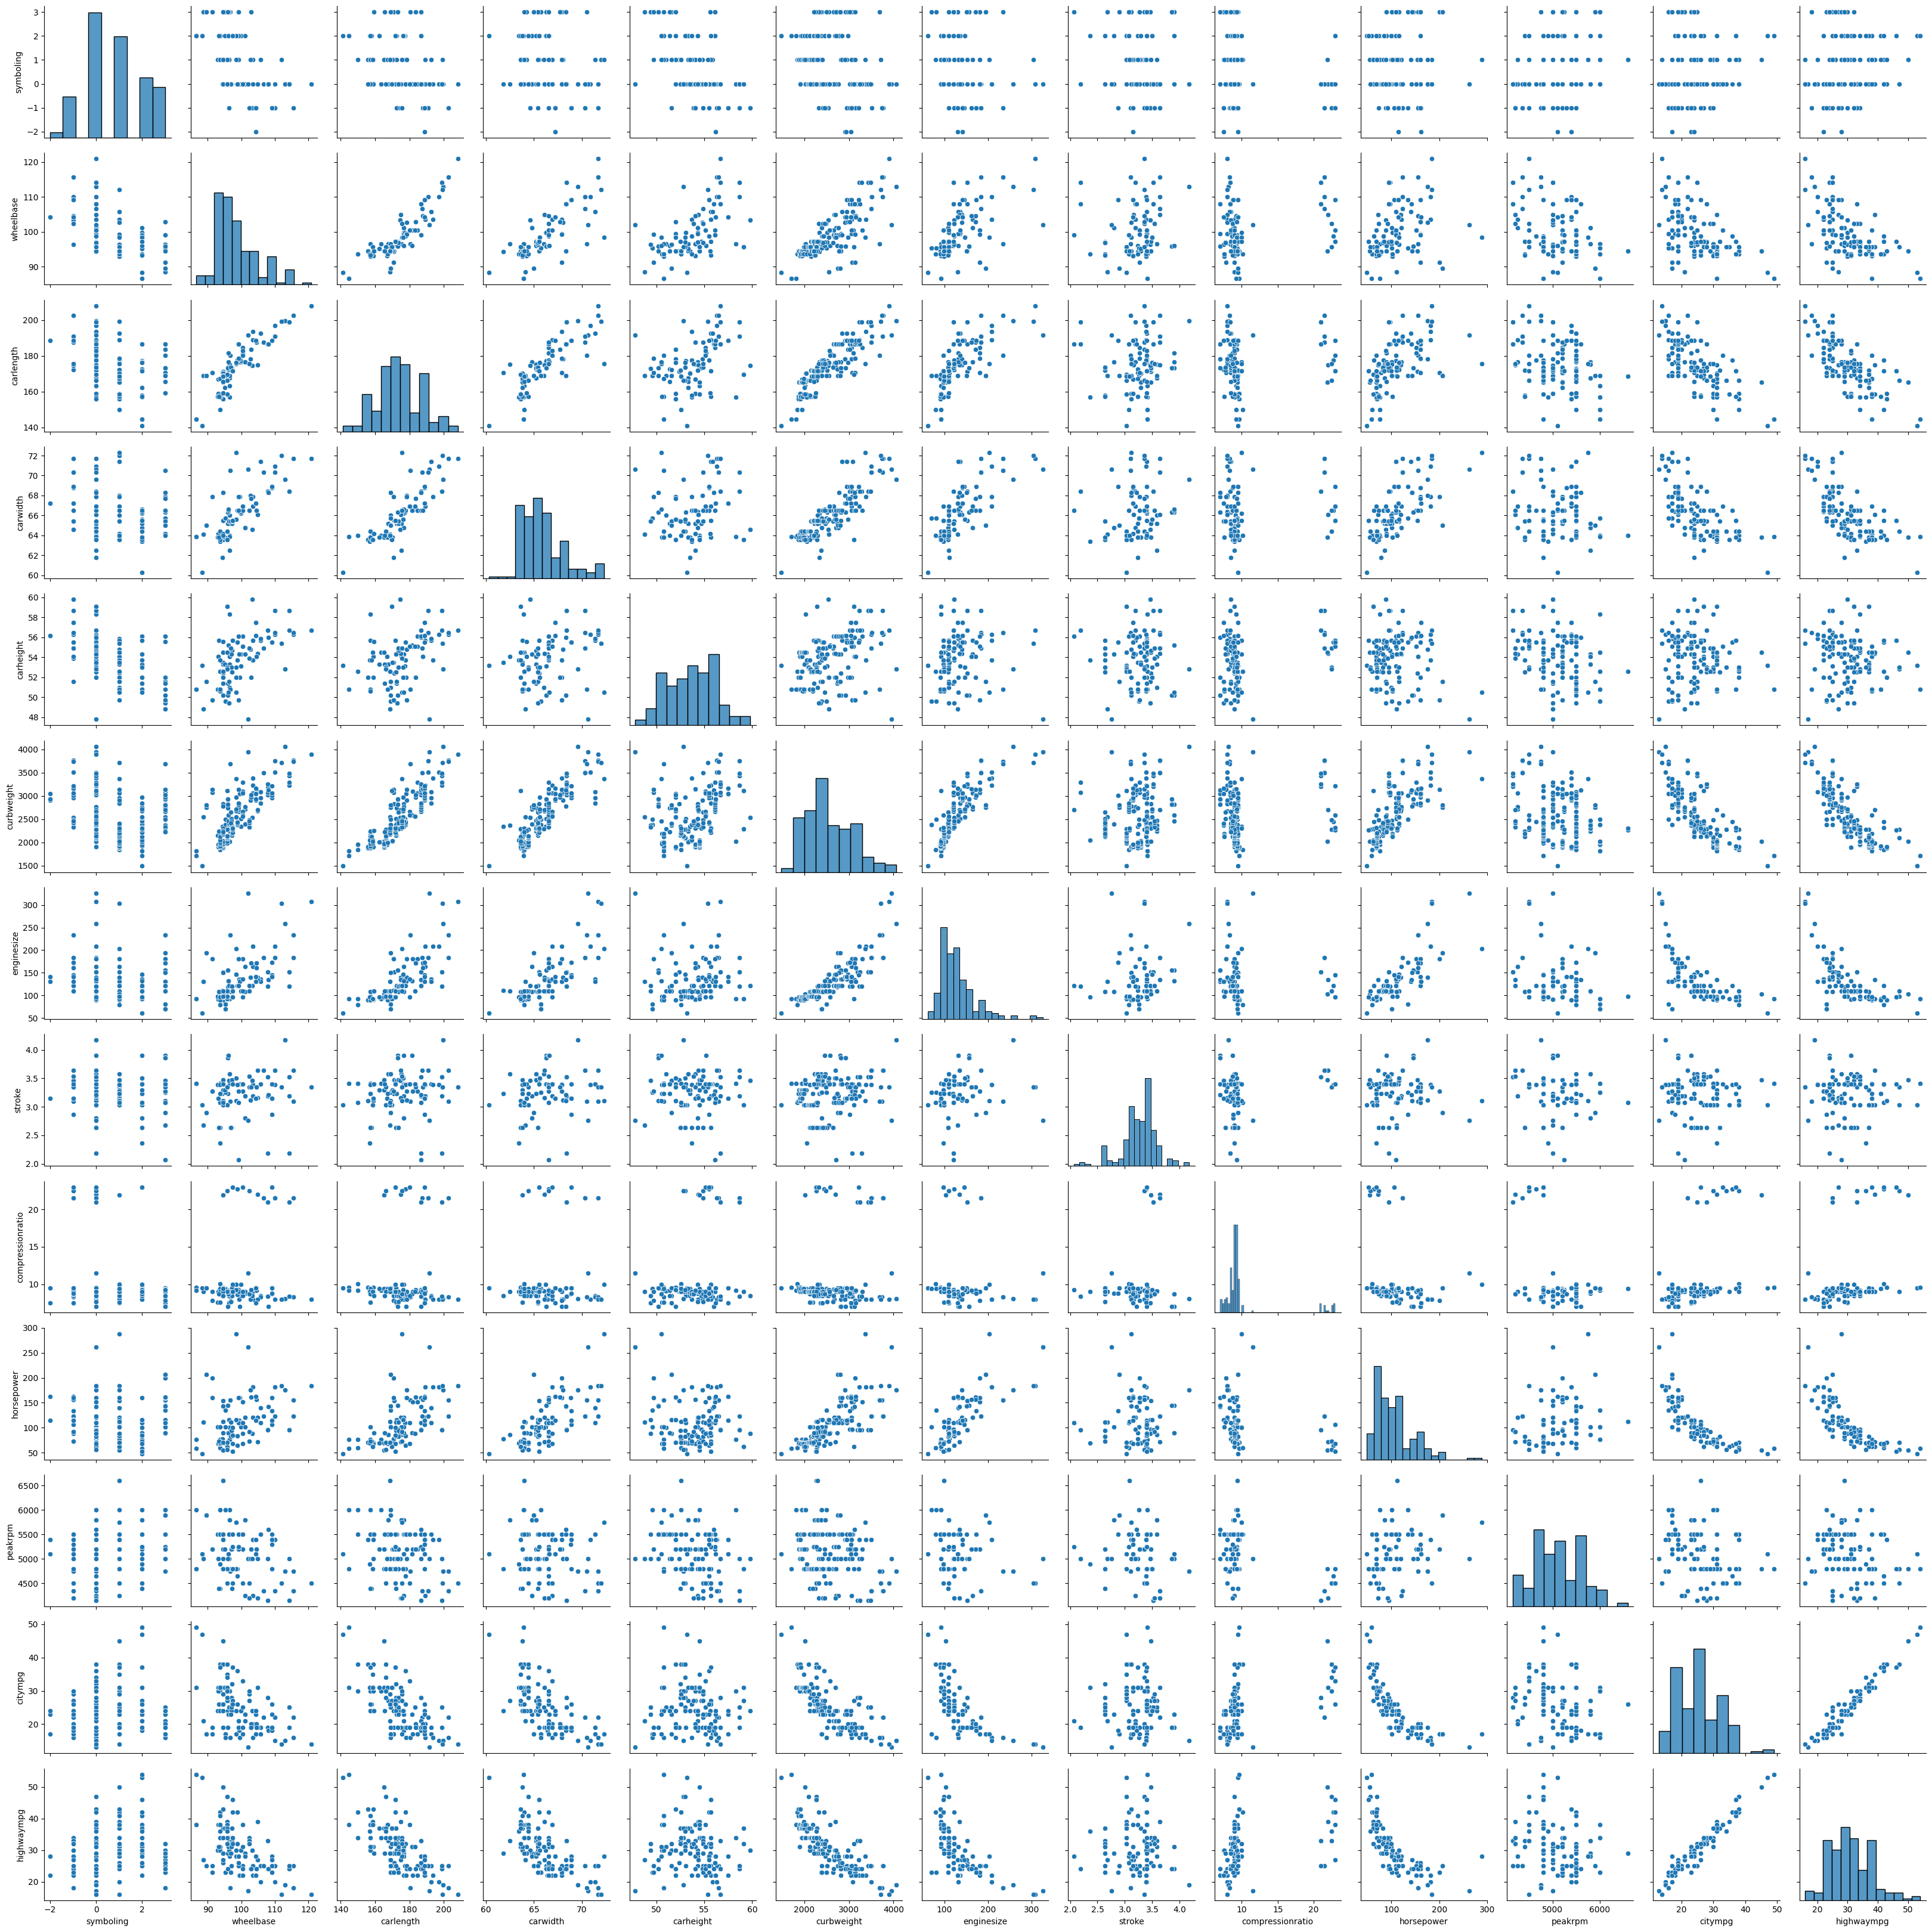

In [19]:
#Dispersion matrix for quantitative variables

sns.pairplot(dfCuantitativas)
plt.tight_layout()

##### Variables categóricas

In [20]:
#Distribution of qualitative variables

def barplot(data):
    
    numData = len(data.columns)
    
    numRow = int(numData/3)+1
    
    plt.figure(figsize=(20, 6*numRow))
    for i, categorical_col in enumerate(data.columns):
            plt.subplot(numRow, 3, i+1)
            sns.countplot(x=categorical_col, data=data)
            plt.title(f'Bar Plot of {categorical_col}')
            plt.xlabel(categorical_col)

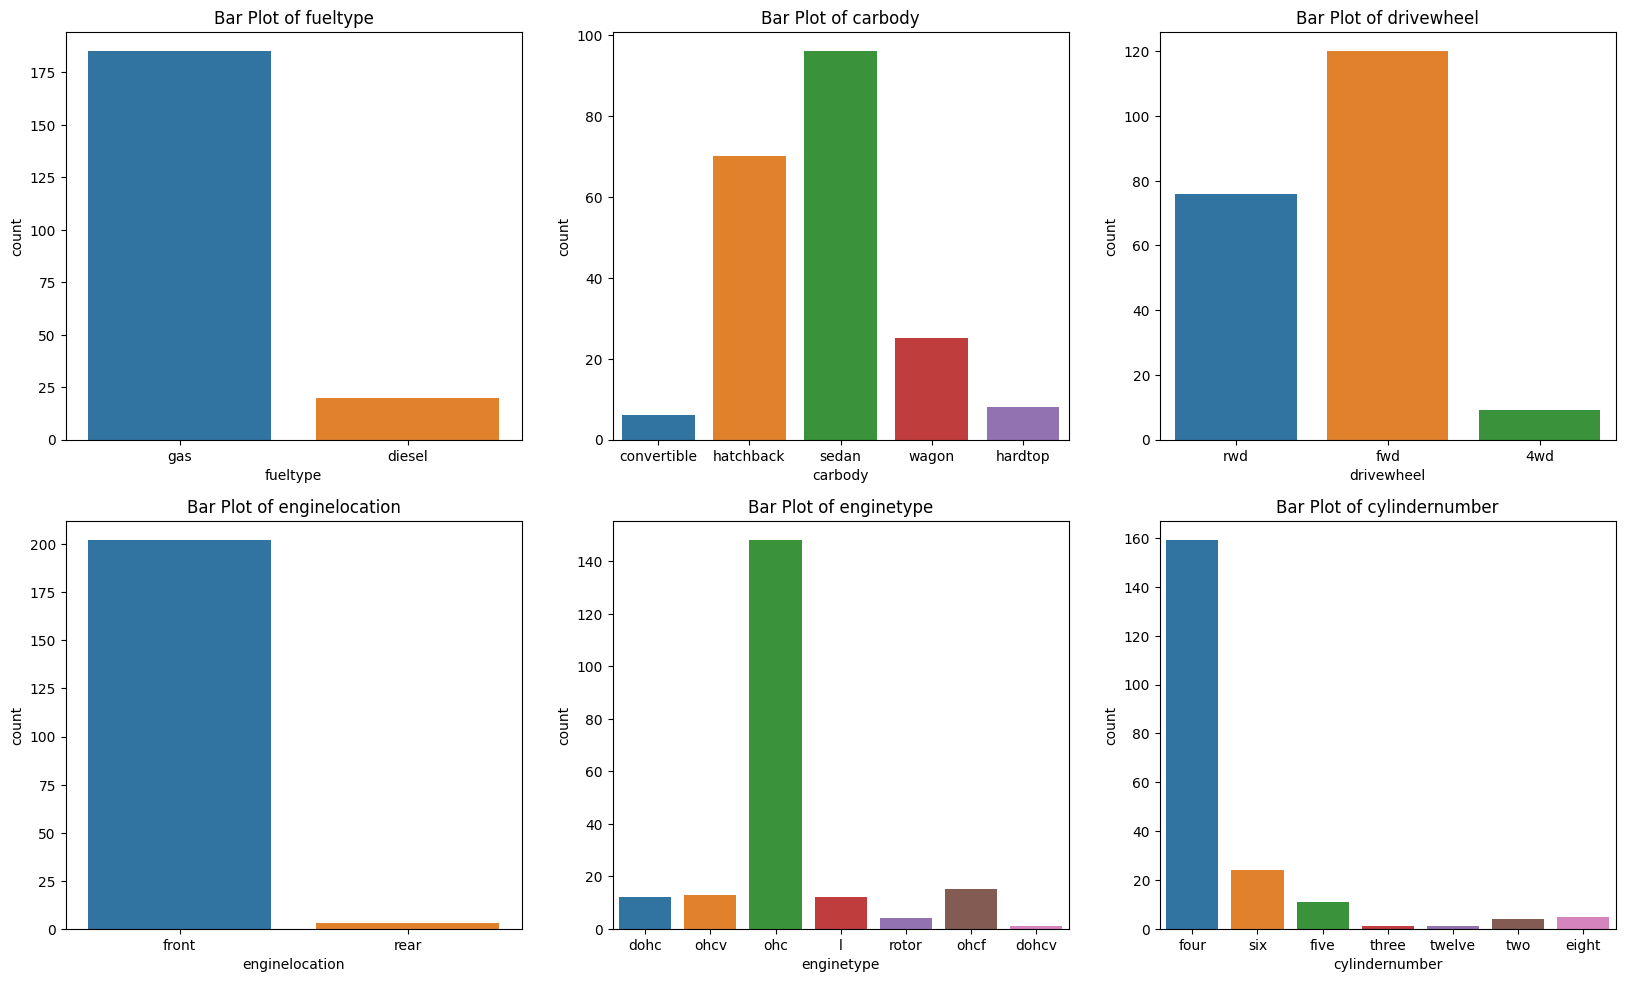

In [21]:
#Distribution of qualitative variables

barplot(dfCualitativas[['fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']])

Text(0.5, 0, 'carcompany')

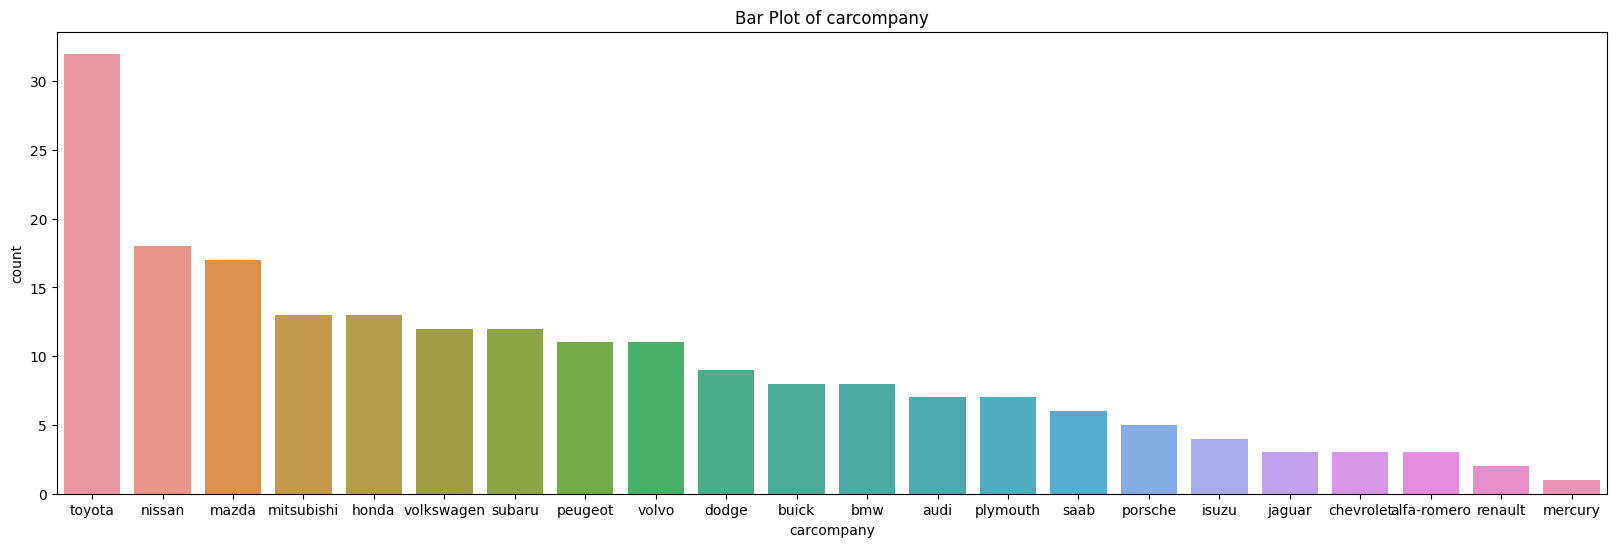

In [22]:
#Barplot for CompanyName

#barplot(dfCualitativas[['CompanyName']])

plt.figure(figsize=(20, 6))
sns.countplot(x='carcompany', data=dfCualitativas[['carcompany']], order=dfCualitativas['carcompany'].value_counts().index)
plt.title('Bar Plot of carcompany')
plt.xlabel(dfCualitativas[['carcompany']].columns)

In [23]:
#Function to create a boxplot for each quantitative variable

def boxplot(cuantitativas, cualitativas):

    # Create a grid of box plots
    plt.figure(figsize=(20, 14))
    for i, numerical_col in enumerate(cuantitativas.columns):
        for j, categorical_col in enumerate(cualitativas.columns):
            plt.subplot(2, 3, i * 3 + j + 1)
            sns.boxplot(x=cualitativas[categorical_col], y=cuantitativas[numerical_col])
            plt.title(f'Box Plot of {numerical_col} by {categorical_col}')
            plt.xlabel(categorical_col)
            plt.ylabel(numerical_col)

    plt.show()

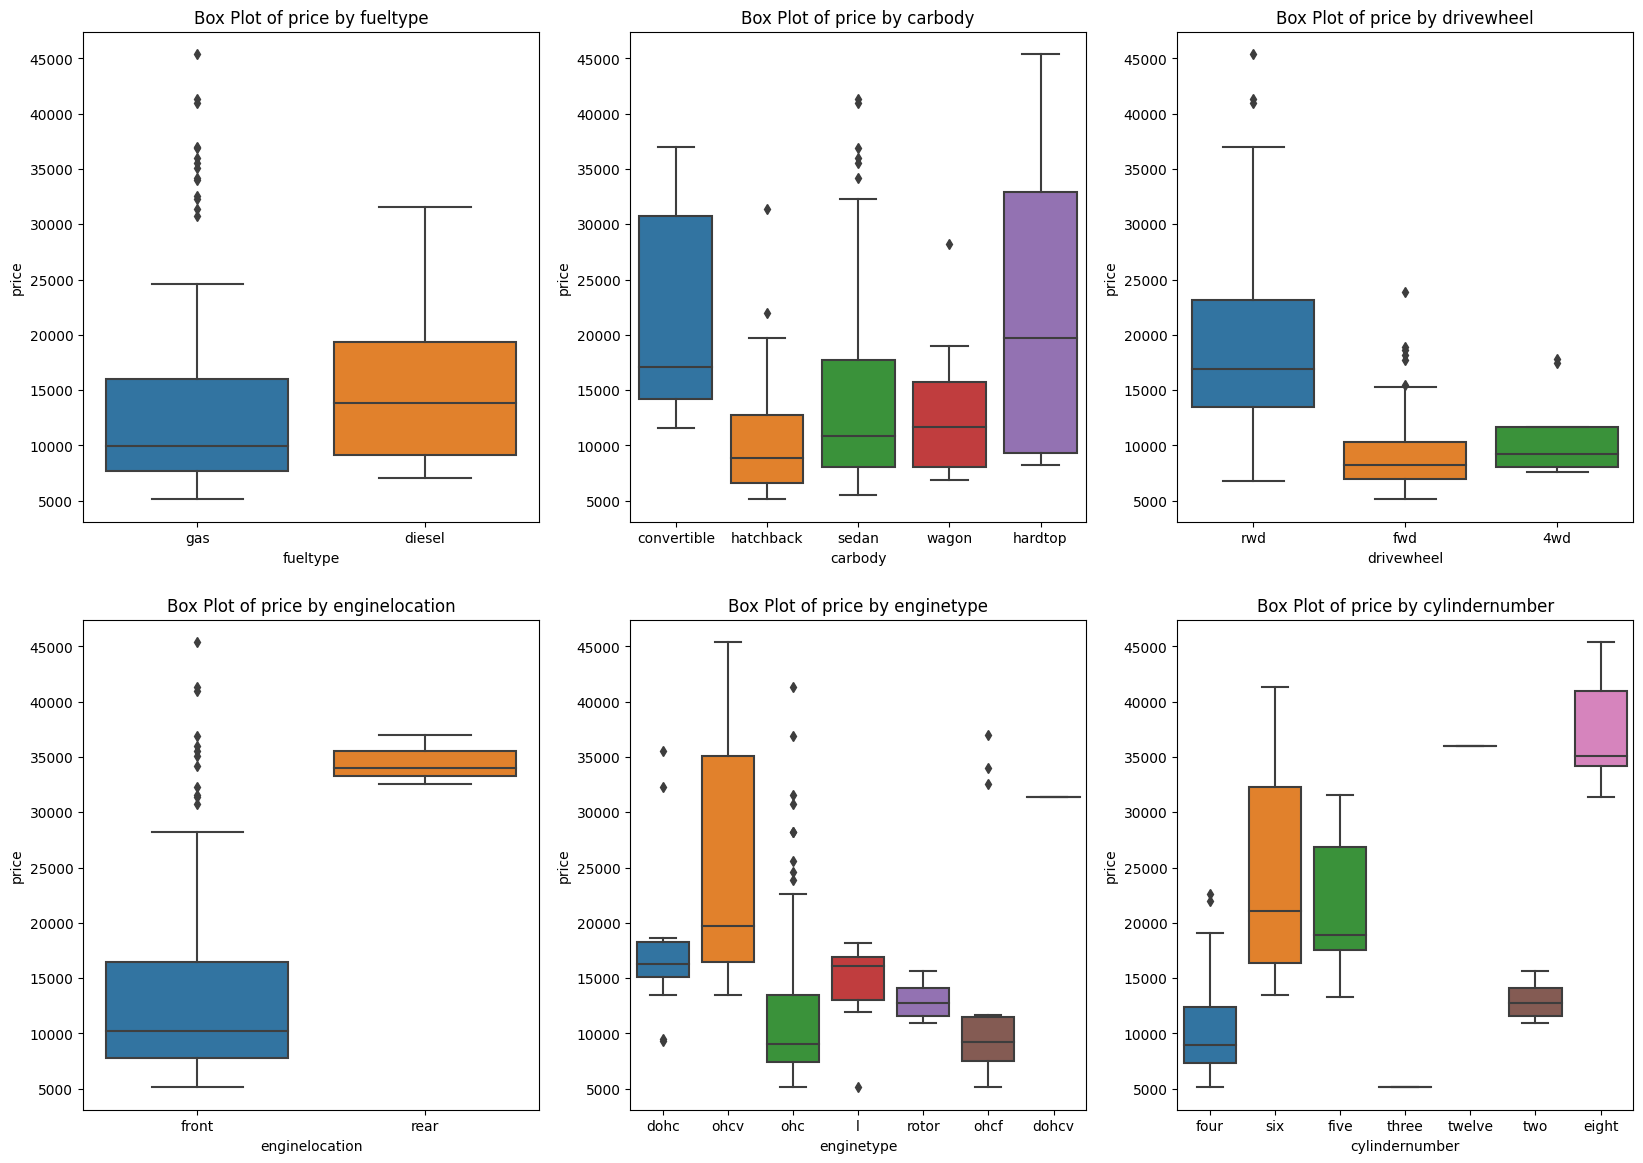

In [24]:
#Boxplot of qualitative variables

boxplot(df[['price']], dfCualitativas[['fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']])

Text(0, 0.5, 'Price')

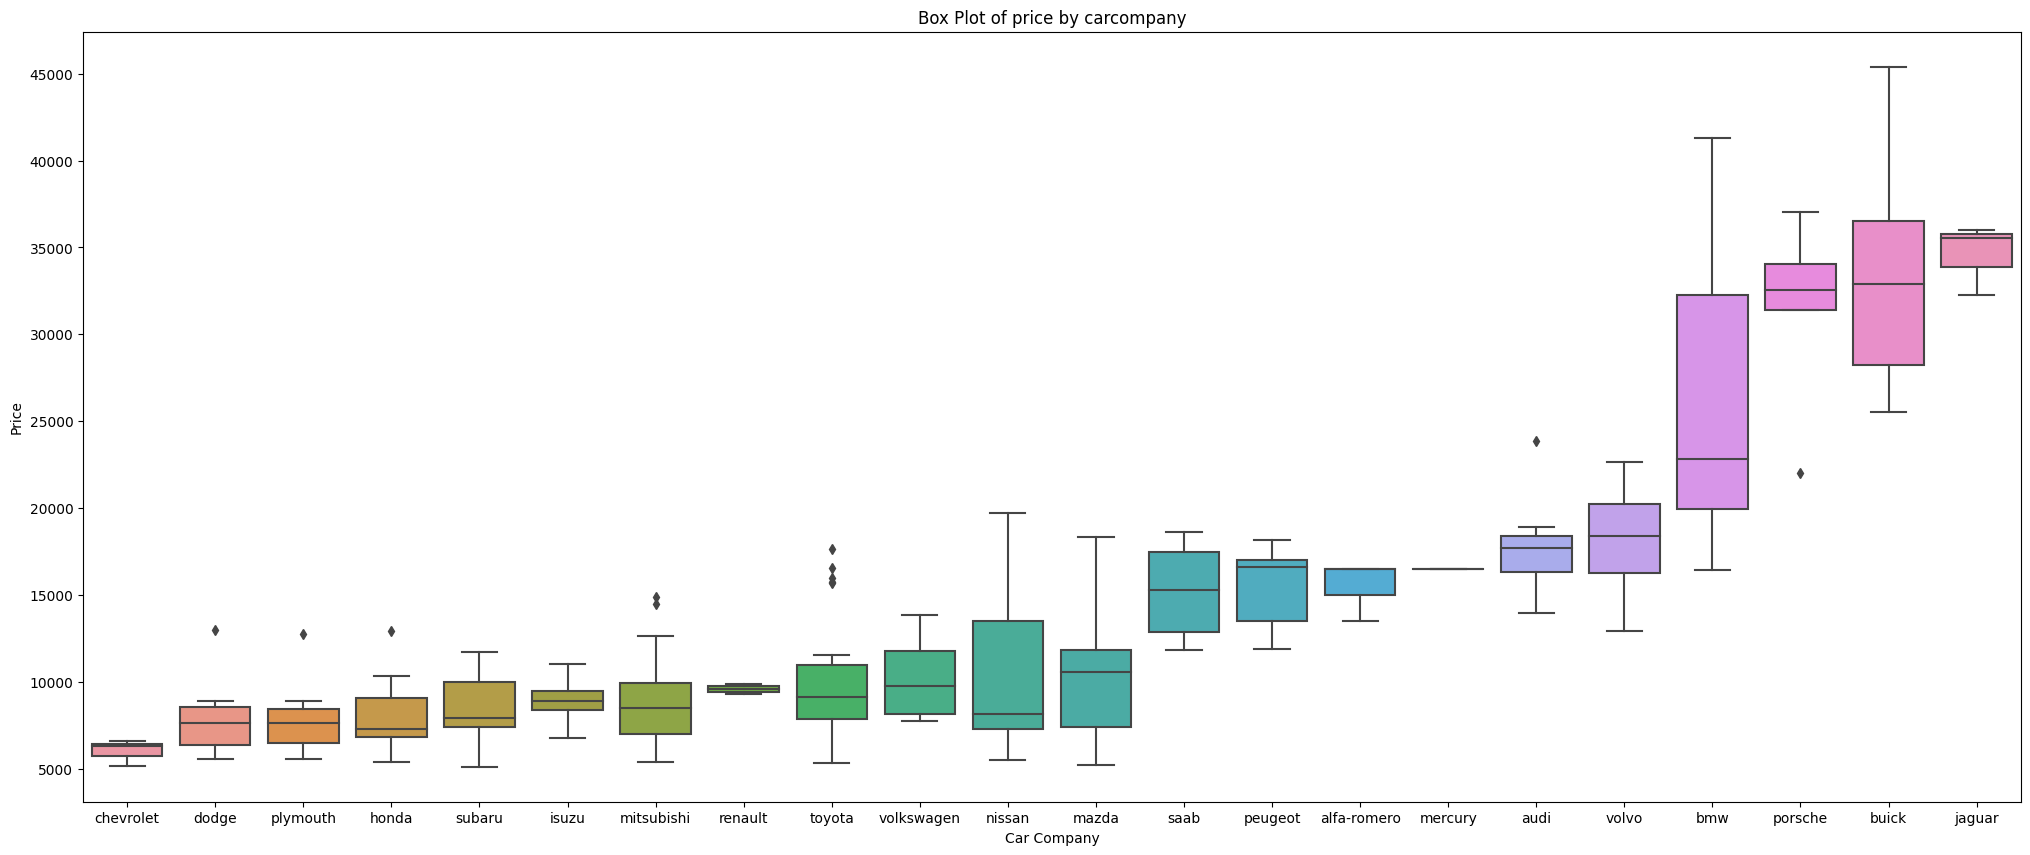

In [25]:
#Boxplot of CompanyName

order=df.groupby(['carcompany'])['price'].mean().sort_values(ascending=True)

plt.figure(figsize=(25, 10))
sns.boxplot(x=dfCualitativas['carcompany'], y=df['price'], order=order.index)
plt.title(f'Box Plot of price by carcompany')
plt.xlabel('Car Company')
plt.ylabel('Price')

#### Identifica problemas de calidad de datos (valores faltantes, outliers, etc).

En este caso particular, no parece que hayan valores faltantes. Todas las columnas cuentan con valores numéricos o descriptivos. Sin embargo, existen atributos que presentan un gran número de outliers utilizando el metodo IQR. Especialmente 'stroke' y 'compressionratio'. Finalmente, de las marcas de vehiculos, se limpiaron a mano tres marcas que contenian faltas de ortografia ('porcshce', 'toyouta' y 'vokswagen').

#### Con base en este análisis selecciona al menos 6 variables que consideres importantes para el análisis de las características de los automóviles que determinan su precio.

Las variables que seleccioné para el análisis son: $carlength$, $carwidth$, $curbweight$, $horsepower$, $drivewheel$, $cylindernumber$ y $carcompany$. Tres cuantiativas y tres cualitativas. 
De las primeras tres, cuantitativas, existió una correlación positiva entre $carlength$ y $curbweight$, y entre $carlength$ y $carwidth$. Aun no puedo asegurar que no exista una depencia entre ellas, pero por el momento no la considero.
De las tres cualitativas, $drivewheel$ y $cylindernumber$ son las que tienen una mayor influencia en el precio. Existe una visible diferencia de precio entre las distintas categorías. En tanto a la variable $carcompany$, no se observa una diferencia tan marcada entre las distintas categorías, pero si se observa una diferencia entre las categorías con mayor precio y las de menor precio.

In [26]:
# Include only the variables of interest and the target variable

variables = ['carlength', 'carwidth', 'curbweight', 'horsepower', 'drivewheel', 'cylindernumber', 'carcompany', 'price']

numerical = ['carlength', 'carwidth', 'curbweight', 'horsepower']
categorical = ['drivewheel', 'cylindernumber', 'carcompany']

dfSimplified = df[variables]

### Preparación de la base de datos

#### Selecciona el conjunto de datos a utilizar.

##### Maneja datos categóricos: transforma a variables dummy si es necesario.

In [27]:
# Remove outliers

dfClean = dfSimplified.copy()

def remove_outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data > lower_bound) & (data < upper_bound)]

for i in numerical:
    dfClean[i] = remove_outliers_iqr(dfClean[i])
    
dfClean.dropna(inplace=True)
dfClean

#dfClean[numerical+['price']].to_csv('numerical.csv', index=False)
#dfClean[categorical+['price']].to_csv('categorical.csv', index=False)

,carlength,carwidth,curbweight,horsepower,drivewheel,cylindernumber,carcompany,price
0,168.8,64.1,2548,111.0,rwd,four,alfa-romero,13495.0
1,168.8,64.1,2548,111.0,rwd,four,alfa-romero,16500.0
2,171.2,65.5,2823,154.0,rwd,six,alfa-romero,16500.0
3,176.6,66.2,2337,102.0,fwd,four,audi,13950.0
4,176.6,66.4,2824,115.0,4wd,five,audi,17450.0
...,...,...,...,...,...,...,...,...
200,188.8,68.9,2952,114.0,rwd,four,volvo,16845.0
201,188.8,68.8,3049,160.0,rwd,four,volvo,19045.0
202,188.8,68.9,3012,134.0,rwd,six,volvo,21485.0
203,188.8,68.9,3217,106.0,rwd,six,volvo,22470.0


## Reporte Primera Entrega:

En esta primera entrega analicé los datos de esta evidencia para un analisis estadístico. Primero observé características generales de las variables (cuantitativas y cualitativas). Apliqué medidas estadísticas como la media, desviación estándar, etc. Mi parte favorita fue la de explorar los datos visualmente. Aquí pude entender la distribución general de los datos y su comportamiento entre variables. También obervé valores extremos y atípicos. Identifiqué las variables con mayor significancia, aunque opino que aun carezco de un sustento mayor para confirmar con veracidad este hecho. Finalmente, preprocesé los datos, eliminando valores atípicos y creando variables dummies para las variables categoricas. Estoy emocioando por la siguiente entrega y poder seguir trabajando con este reto.

## 

# Momento de Retroalimentación: Módulo 1 Construcción de un modelo estadístico base (Portafolio Análisis) Fabian Trejo A01423983

## Preparacion de la base de datos

### Con base en ese análisis exploratorio, seleccionaste al menos 6 variables que consideraste importantes para el análisis de las características de los automóviles que determinan su precio.

#### Verifiacion de estas variables seleccionadas

In [28]:
# ANOVA for categorical variables

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula='price ~ drivewheel*cylindernumber*carcompany', data=dfClean[categorical+['price']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     26.12
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           1.65e-49
Time:                        23:27:00   Log-Likelihood:                -1750.7
No. Observations:                 191   AIC:                             3579.
Df Residuals:                     152   BIC:                             3706.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Analisis en R

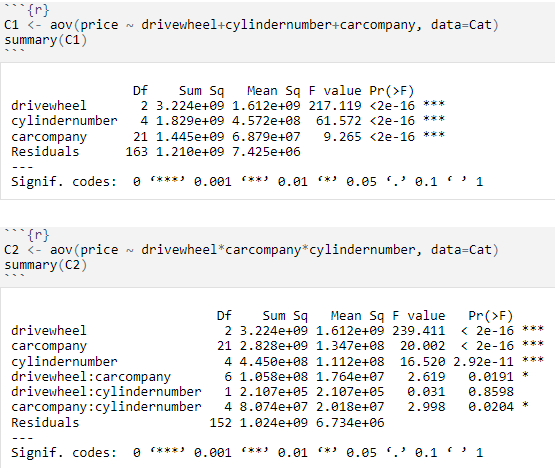

##### Resultados de ANOVA 

Notamos que todas las variables sin interaccion tienen un p-value menor a 0.05, por lo que podemos decir que todas las variables son significativas para el modelo. Sin embargo, tomando en cuenta los valores con interaccion, las variables no presentan una relacion fuerte. Es por eso que se decidio eliminar la interaccion entre las variables.

In [29]:
# Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dfClean[numerical]
y = dfClean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

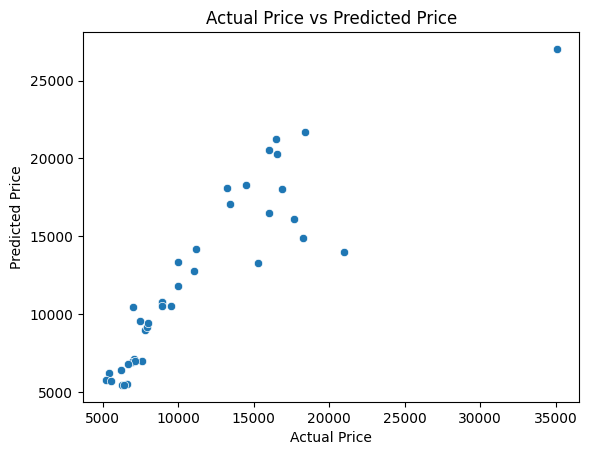

In [31]:
# Residuals

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

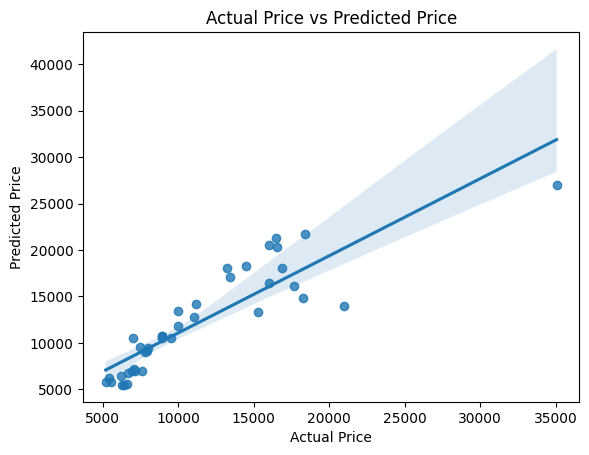

In [32]:
# Graph linear regression

sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()



Analisis en R

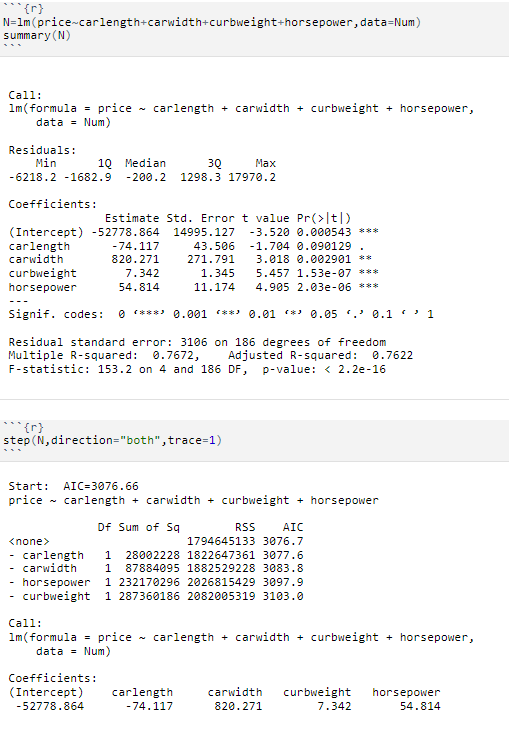

##### Resultados del lm

En este caso, notamos que la mayoria de las variables tienen un Pr value menor a 0.01. Estas variables se podrian considerar significativas para el modelo. Sin embargo, la variable $carlength$ presenta un valor de 0.09. Aunque este valor es menor, no parece ser lo suficientemente significativo para el modelo. Por lo tanto, se decidio eliminar esta variable del modelo.

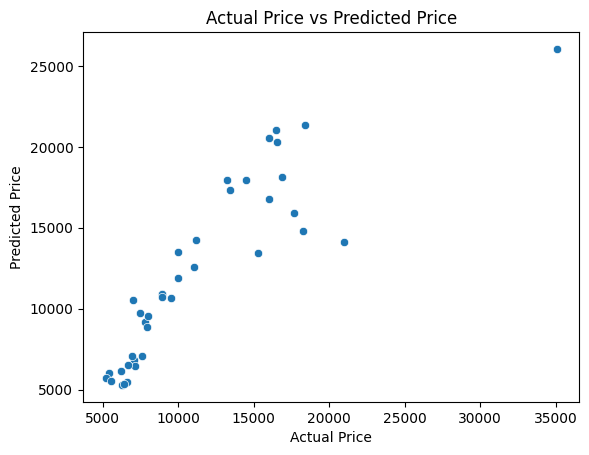

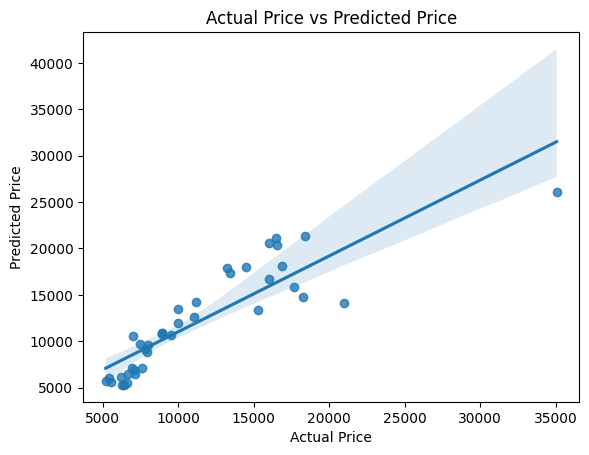

In [33]:
# Linear regression

X = dfClean[numerical].drop(['carlength'], axis=1)
y = dfClean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
# Residuals

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

# Graph linear regression

sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

Como era de esperarse, el modelo no cambio mucho. Esto confirma la hipotesis de que la variable $carlength$ no es significativa para el modelo.

Convertiremos las variables categoricas a variables dummy para poder utilizarlas en el modelo.

In [34]:
# One hot encoding

dfClean.drop(['carlength'], axis=1, inplace=True)

dfOneHot = pd.get_dummies(dfClean, columns = categorical, drop_first=True)
dfOneHot.head()

,carwidth,curbweight,horsepower,price,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
0,64.1,2548,111.0,13495.0,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,64.1,2548,111.0,16500.0,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,65.5,2823,154.0,16500.0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,66.2,2337,102.0,13950.0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,66.4,2824,115.0,17450.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Este dataset sería la propuesta final para implementar algún modelo.

### Conclusiones

Este analisis estadístico nos ayudó a entender mejor los datos y a identificar las variables más significativas para el modelo. Pudimos comprobar de manera estadística que las variables fueran significativas y se pudo observar que las variables que se eliminaron no afectaron mucho al modelo. Podemos decir que las variables seleccionadas son las más significativas para el modelo.